The goal of this project is to predict future sales using machine learning techniques. We analyze past sales data, clean it, perform exploratory data analysis, and build a predictive model.

**Import Libraries & Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/Ecommerce.csv", encoding='latin-1')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Data Cleaning, Check for Missing Values,Remove Duplicates, Convert Data Types**

In [8]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [12]:
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
df.duplicated().sum()

5268

In [14]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [17]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.0
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.69057
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.0
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.0
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.0
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.0
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.0
std,218.081158,NaN,96.759853,1713.600303


**Remove negative values in 'Quantity' & 'UnitPrice'  **

In [18]:
df_cleaned = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

**Exploratory Data Analysis**

In [19]:
df_cleaned['TotalSales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

<ipython-input-19-b705534055e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalSales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [20]:
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('InvoiceMonth')['TotalSales'].sum()

<ipython-input-20-d4df9e28325c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')


**Sales Trend Over The Year**

**Identified seasonal trends in sales.Plotted sales distribution across different time periods.**

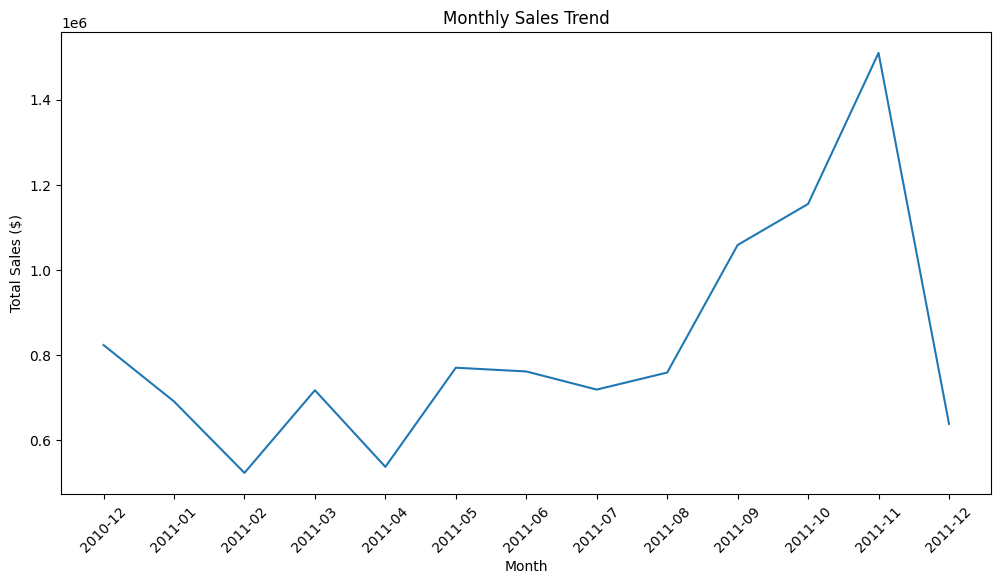

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.show()

**Top 10 Best-Selling Products**

In [22]:
top_products = df_cleaned.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

<ipython-input-24-33d3c45ee144>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


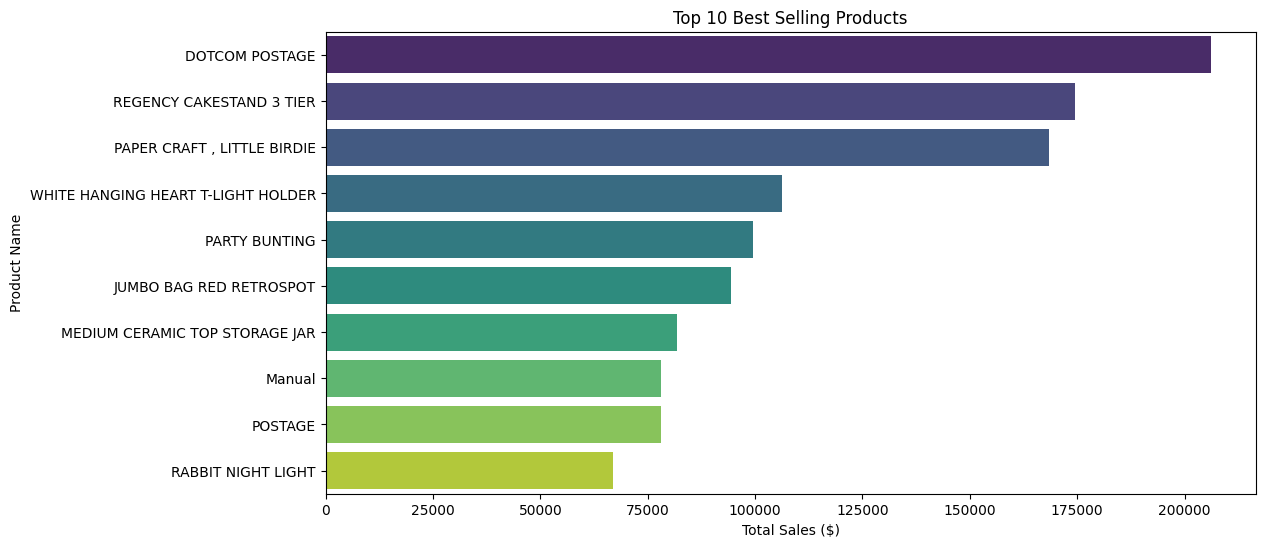

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.show()

**Top 10 Best-Selling Products**

In [25]:
customer_sales = df_cleaned.groupby('CustomerID')['TotalSales'].sum()

print(customer_sales.describe())

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: TotalSales, dtype: float64


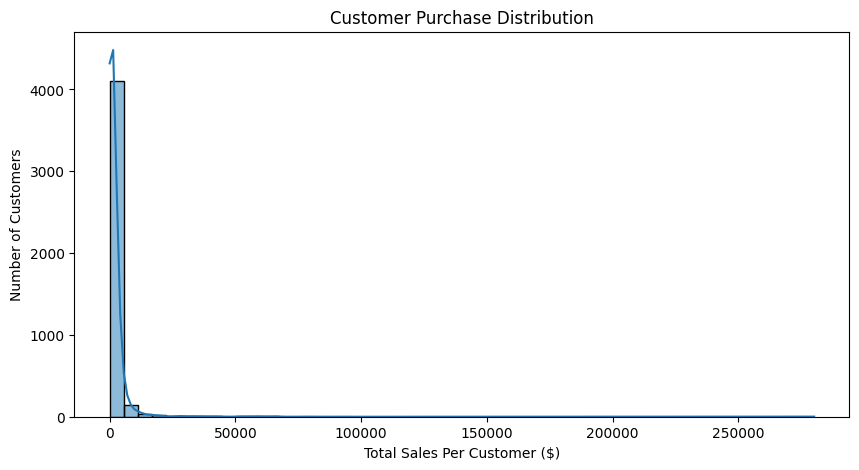

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(customer_sales, bins=50, kde=True)
plt.title("Customer Purchase Distribution")
plt.xlabel("Total Sales Per Customer ($)")
plt.ylabel("Number of Customers")
plt.show()

**Predictive Analysis for Sales Forecasting in E-Commerce**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
df_cleaned = df.copy()

In [37]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day',
       'Weekday'],
      dtype='object')

In [40]:
df_cleaned['TotalSales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [39]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day',
       'Weekday'],
      dtype='object')

**Feature Engineering**

In [41]:
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['Weekday'] = df_cleaned['InvoiceDate'].dt.weekday

monthly_sales = df_cleaned.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()

monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year','Month']].assign(Day=1))

monthly_sales.drop(columns=['Year','Month'], inplace=True)

monthly_sales.head()

,TotalSales,Date
0,748957.020,2010-12-01
1,560000.260,2011-01-01
2,498062.650,2011-02-01
3,683267.080,2011-03-01
4,493207.121,2011-04-01


use past sales data to predict future sales

In [44]:
X = np.arange(len(monthly_sales)).reshape(-1,1)
y = monthly_sales['TotalSales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Train a Random Forest Model**

In [45]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

**Evaluate Model Performance**

In [47]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_absolute_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 402089.6341000001
Root Mean Squared Error (RMSE): 634.1053809107758
R-squared (R2): -0.05153491430423185


**Visualizing Predictions**

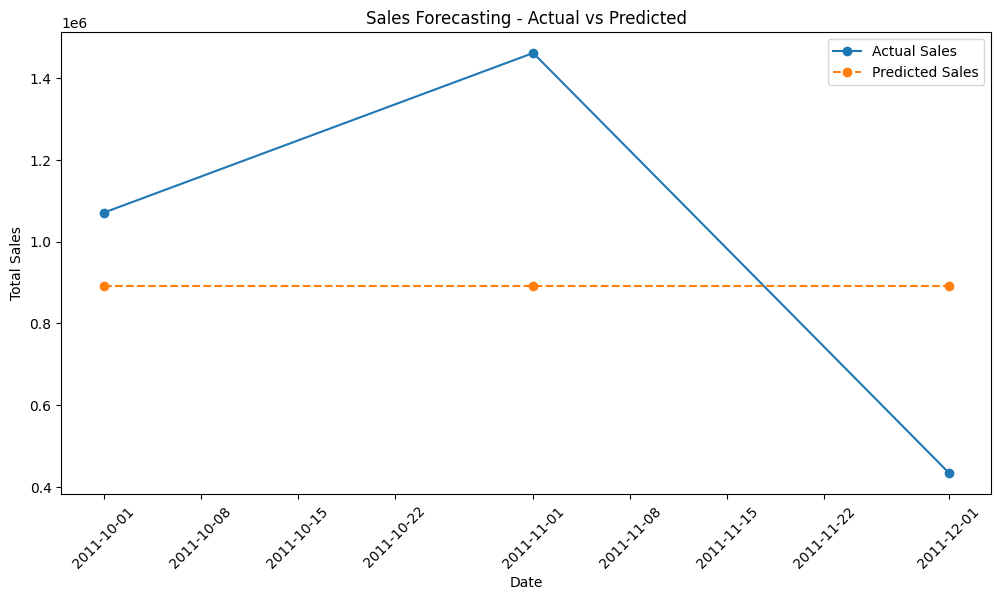

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'].iloc[len(X_train):], y_test, label="Actual Sales", marker='o')
plt.plot(monthly_sales['Date'].iloc[len(X_train):], y_pred, label="Predicted Sales", linestyle='dashed', marker='o')

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Forecasting - Actual vs Predicted")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [49]:
df_cleaned.to_csv("ecommerce_cleaned_data.csv", index=False)

conclusion

The actual sales trend fluctuates, showing peaks and drops.
The model predictions appear to be too static, suggesting potential overfitting or underfitting.

This project provides a foundation for e-commerce sales forecasting. While the current model gives a baseline prediction, further optimizations are needed to improve accuracy and adaptability.

